In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
import pywt
from sklearn.model_selection import cross_val_score
%matplotlib inline

# Data Preprocessing

In [2]:
face_cascade = cv2.CascadeClassifier('opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('opencv/haarcascade_eye.xml')


In [3]:
def crop_img_2eye(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >=2:
            return roi_color
            

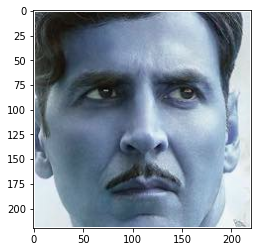

In [4]:
example = crop_img_2eye('./data/Akshay/1.jpg')
plt.imshow(example)

In [5]:
path_to_data = "./data/"
path_to_cr_data = "./data/cropped/"


import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [6]:
img_dirs

['./data/Akshay',
 './data/cropped',
 './data/Depika',
 './data/kohli',
 './data/messi',
 './data/m_Sharapova',
 './data/Nora',
 './data/Ranbir',
 './data/Urvashi']

In [7]:

import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)



In [8]:

cropped_image_dirs = []
for img_dir in img_dirs:
#     print(img_dir)
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    for entry in os.scandir(img_dir):
#         print(entry.path)
        try:
            roi_color = crop_img_2eye(entry.path)
        except:
            continue
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            count += 1

Generating cropped images in folder:  ./data/cropped/Akshay
Generating cropped images in folder:  ./data/cropped/Depika
Generating cropped images in folder:  ./data/cropped/kohli
Generating cropped images in folder:  ./data/cropped/messi
Generating cropped images in folder:  ./data/cropped/m_Sharapova
Generating cropped images in folder:  ./data/cropped/Nora
Generating cropped images in folder:  ./data/cropped/Ranbir
Generating cropped images in folder:  ./data/cropped/Urvashi


In [9]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Akshay': ['./data/cropped/Akshay\\Akshay1.png',
  './data/cropped/Akshay\\Akshay10.png',
  './data/cropped/Akshay\\Akshay11.png',
  './data/cropped/Akshay\\Akshay12.png',
  './data/cropped/Akshay\\Akshay13.png',
  './data/cropped/Akshay\\Akshay14.png',
  './data/cropped/Akshay\\Akshay15.png',
  './data/cropped/Akshay\\Akshay16.png',
  './data/cropped/Akshay\\Akshay17.png',
  './data/cropped/Akshay\\Akshay18.png',
  './data/cropped/Akshay\\Akshay19.png',
  './data/cropped/Akshay\\Akshay2.png',
  './data/cropped/Akshay\\Akshay20.png',
  './data/cropped/Akshay\\Akshay21.png',
  './data/cropped/Akshay\\Akshay22.png',
  './data/cropped/Akshay\\Akshay23.png',
  './data/cropped/Akshay\\Akshay24.png',
  './data/cropped/Akshay\\Akshay25.png',
  './data/cropped/Akshay\\Akshay26.png',
  './data/cropped/Akshay\\Akshay27.png',
  './data/cropped/Akshay\\Akshay28.png',
  './data/cropped/Akshay\\Akshay29.png',
  './data/cropped/Akshay\\Akshay3.png',
  './data/cropped/Akshay\\Akshay30.png',
  './data

In [10]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Akshay': 0,
 'Depika': 1,
 'kohli': 2,
 'messi': 3,
 'm_Sharapova': 4,
 'Nora': 5,
 'Ranbir': 6,
 'Urvashi': 7}

In [11]:

import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img

    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;

    coeffs=pywt.wavedec2(imArray, mode, level=level)


    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [12]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [13]:
cv2.imshow('a',img)
cv2.waitKey(0)

-1

In [14]:
example2 = w2d(img, mode='haar', level=1)
cv2.imshow('a',example2)
cv2.waitKey(0)

-1

In [15]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(483, 4096)

In [16]:
class_dict

{'Akshay': 0,
 'Depika': 1,
 'kohli': 2,
 'messi': 3,
 'm_Sharapova': 4,
 'Nora': 5,
 'Ranbir': 6,
 'Urvashi': 7}

In [17]:
from collections import Counter
Counter(y)

Counter({0: 60, 1: 72, 2: 48, 3: 39, 4: 35, 5: 46, 6: 63, 7: 120})

# Modeling

In [18]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(X).transform(X)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

## Hyper Parameter Tunning

In [22]:
lr = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)



In [23]:
lr.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

 ## Evaluation

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56         9
           1       0.68      0.81      0.74        16
           2       0.90      0.75      0.82        12
           3       1.00      0.80      0.89         5
           4       0.50      0.60      0.55         5
           5       0.80      0.67      0.73        12
           6       0.93      0.72      0.81        18
           7       0.64      0.80      0.71        20

    accuracy                           0.73        97
   macro avg       0.75      0.71      0.73        97
weighted avg       0.76      0.73      0.74        97



In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lr.predict(X_test))
cm

array([[ 5,  1,  0,  0,  1,  0,  1,  1],
       [ 0, 13,  0,  0,  1,  1,  0,  1],
       [ 2,  1,  9,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  4,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  3,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  8,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 13,  5],
       [ 1,  1,  0,  0,  1,  1,  0, 16]], dtype=int64)

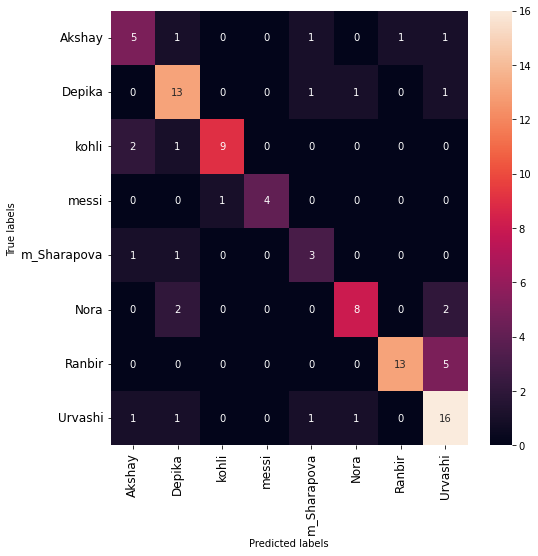

In [28]:

import seaborn as sns 
fig, ax = plt.subplots(figsize=(8,8))

g = sns.heatmap(cm,annot=True,ax=ax)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 12)
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 12)
ax.xaxis.set_ticklabels(class_dict.keys()); ax.yaxis.set_ticklabels(class_dict.keys());
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 


In [29]:
class_dict

{'Akshay': 0,
 'Depika': 1,
 'kohli': 2,
 'messi': 3,
 'm_Sharapova': 4,
 'Nora': 5,
 'Ranbir': 6,
 'Urvashi': 7}

## Save Model

In [30]:
lr.fit(X,y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
import joblib
joblib.dump(lr, 'saved_model.pkl')

['saved_model.pkl']

## Save Labels

In [32]:

import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

# Load and Predict

In [33]:
global __model
global __class_number_to_name
with open('saved_model.pkl', 'rb') as f:
     __model = joblib.load(f)

In [34]:
with open("class_dictionary.json", "r") as f:
        class_name_to_number = json.load(f)
        __class_number_to_name = {v:k for k,v in class_name_to_number.items()}

In [35]:
face_cascade = cv2.CascadeClassifier('opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('opencv/haarcascade_eye.xml')

In [36]:
def crop_img_2eye(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >=2:
            return roi_color
            

def w2d(img, mode='haar', level=1):
    imArray = img

    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;

    coeffs=pywt.wavedec2(imArray, mode, level=level)


    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

def predict(path):
    img = crop_img_2eye(path)
    scalled_raw_img = cv2.resize(img, (32, 32))
    img_har = w2d(img,'db1',5)
    scalled_img_har = cv2.resize(img_har, (32, 32))
    test_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
    return __class_number_to_name[__model.predict(test_img.reshape(1,-1))[0]]

Test image is,


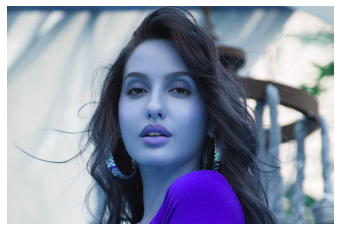

Predicted Person is : Nora


Test image is,


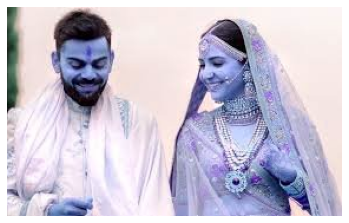

Image isn't clear


Test image is,


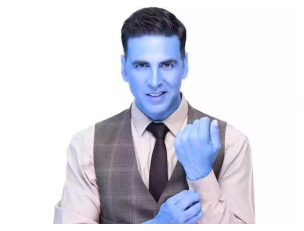

Predicted Person is : m_Sharapova


Test image is,


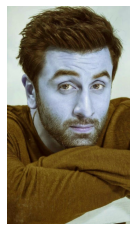

Predicted Person is : Urvashi


Test image is,


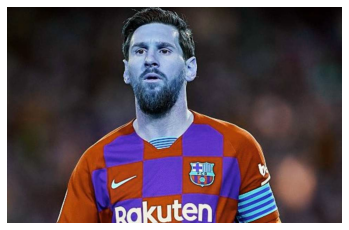

Predicted Person is : messi


Test image is,


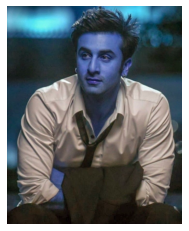

Predicted Person is : Ranbir


Test image is,


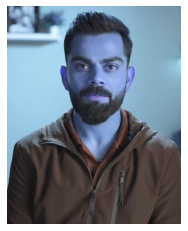

Predicted Person is : kohli


Test image is,


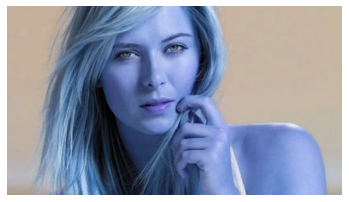

Predicted Person is : m_Sharapova


Test image is,


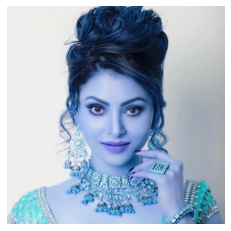

Predicted Person is : Urvashi


Test image is,


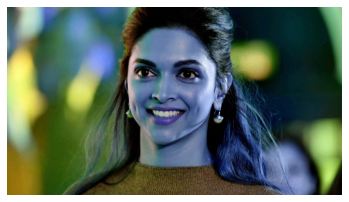

Predicted Person is : Depika




In [37]:
import os
data = os.listdir('test/')
for test_img in data:
    print('Test image is,')
    img = cv2.imread('test/'+test_img)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    try:
        pred = predict('test/'+test_img)
        print('Predicted Person is : {}'.format(pred))
    except:
        print('Image isn\'t clear')
    print()
    print()